In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [42]:
df = pd.read_csv('./monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [43]:
df.dropna(inplace=True)
df['Month'] = pd.to_datetime(df['Month'])
print(df.dtypes)

Month                                                       datetime64[ns]
Monthly milk production: pounds per cow. Jan 62 ? Dec 75           float64
dtype: object


In [44]:
df = df.rename(columns = {'Month':'ds','Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'y'})
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


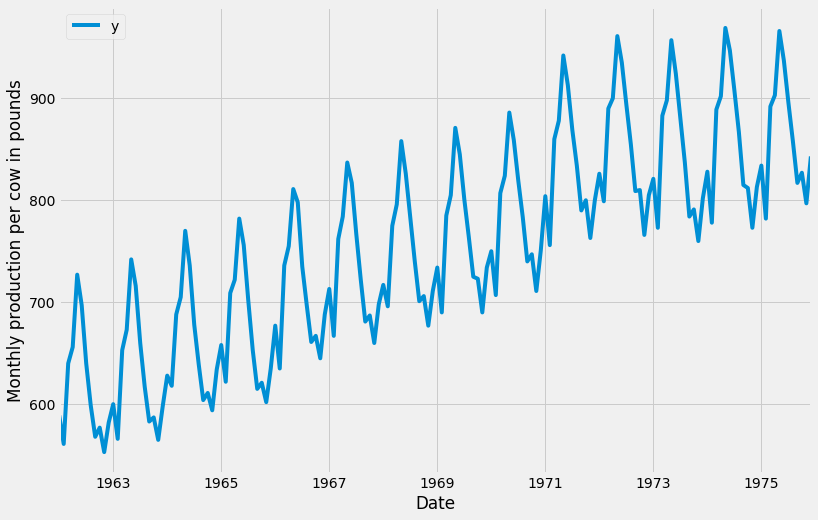

In [45]:
pd.plotting.register_matplotlib_converters()
ax = df.set_index('ds').plot(figsize=(12, 8))
plt.ylabel('Monthly production per cow in pounds')
plt.xlabel('Date')
plt.show()

In [58]:
#here interval width is used to represent the uncertainity factor. More on this in the 
#upcoming cell
model = Prophet(interval_width = 0.95).fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
future_dates = model.make_future_dataframe(periods = 36, freq = 'MS')
future_dates.tail()

,ds
199,1978-08-01
200,1978-09-01
201,1978-10-01
202,1978-11-01
203,1978-12-01


In [71]:
forecast = model.predict(future_dates)
forecast[['yhat','ds','yhat_lower','yhat_upper']]

,yhat,ds,yhat_lower,yhat_upper
0,586.774860,1962-01-01,571.527885,601.938677
1,546.014381,1962-02-01,531.587191,559.805648
2,641.565665,1962-03-01,625.598694,656.457076
3,658.582860,1962-04-01,643.889807,673.424041
4,721.564225,1962-05-01,706.153365,737.220663
...,...,...,...,...
199,874.932864,1978-08-01,834.720366,918.942687
200,832.835188,1978-09-01,792.313731,877.839764
201,837.097160,1978-10-01,793.863733,885.182209
202,806.582118,1978-11-01,758.414032,855.650247


Here we have set interval_width = 0.95 which gives room for uncertainity in data.
Setting a lower value for interval_width would give less room for data uncertainity.
You can tweak the value and check for yourself, in order to check you can see the range
difference in yhat_lower and y_hat upper values.
Since future is uncertain it's advised to take uncertainity into account and choose a large
value of interval_width.

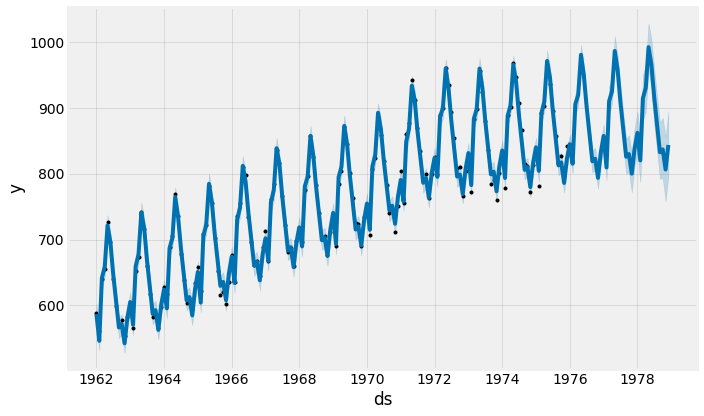

In [72]:
plot = model.plot(forecast,uncertainty=True)

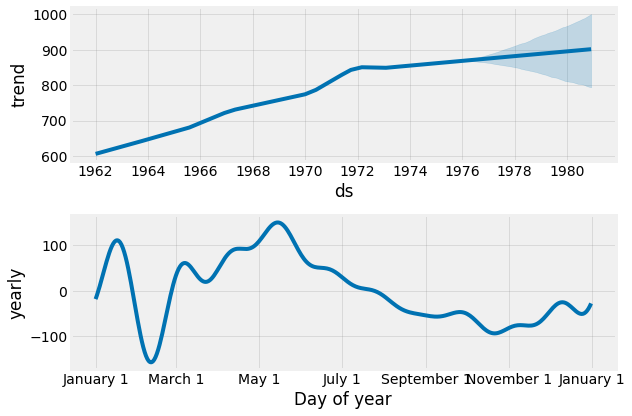

In [69]:
plot = model.plot_components(forecast)

As you keep increasing the time period for predicting, you would get large uncertainity in
your prediction.